<a href="https://colab.research.google.com/github/Deepak-Mewada/Miscellaneous/blob/main/Hybrid_Classifier_8_channels_tunned.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Installation

In [ ]:
# computations
import pandas as pd
import numpy as np

# visualisation
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.max_open_warning': 0})
import seaborn as sns

import scipy
from sklearn.cross_decomposition import CCA
from scipy import signal, stats
import sklearn

In [ ]:
!pip install lazypredict

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
import numpy as np

In [ ]:
import lazypredict
from lazypredict.Supervised import LazyClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:
print(sklearn.__version__)

1.2.2


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Reading Data and Scaling


In [ ]:
# List of file names
file_names = [1, 2, 3, 4, 5, 6]

# Load and concatenate the CSV files
dataframes = [pd.read_csv("/content/drive/MyDrive/Tutan Nama/BTP-MTP/Tanmay/OpenBCI Data/Tutan/Marked_Dataset_Tutan_" + str(filename) + ".csv") for filename in file_names]
df = pd.concat(dataframes, ignore_index=True)

# Display the combined dataframe
df

# List of file names
file_names = [1, 2, 3, 4, 5, 6]

# Initialize an empty DataFrame
df = pd.DataFrame()

# Loop through the list of files and append each to the large_dataframe
for file_name in file_names:
    # Read the current CSV file
    temp_df = pd.read_csv("/content/drive/MyDrive/Tutan Nama/BTP-MTP/Tanmay/OpenBCI Data/Tutan/Marked_Dataset_Tutan_" + str(file_name) + ".csv")
    print("/content/drive/MyDrive/Tutan Nama/BTP-MTP/Tanmay/OpenBCI Data/Tutan/Marked_Dataset_Tutan_" + str(file_name) + ".csv")
    print(len(temp_df))
    # Append the data from temp_df to large_dataframe
    df = pd.concat([df, temp_df], ignore_index=True)

# Display the combined dataframe
df



/content/drive/MyDrive/Tutan Nama/BTP-MTP/Tanmay/OpenBCI Data/Tutan/Marked_Dataset_Tutan_1.csv
25000
/content/drive/MyDrive/Tutan Nama/BTP-MTP/Tanmay/OpenBCI Data/Tutan/Marked_Dataset_Tutan_2.csv
25000
/content/drive/MyDrive/Tutan Nama/BTP-MTP/Tanmay/OpenBCI Data/Tutan/Marked_Dataset_Tutan_3.csv
25000
/content/drive/MyDrive/Tutan Nama/BTP-MTP/Tanmay/OpenBCI Data/Tutan/Marked_Dataset_Tutan_4.csv
25000
/content/drive/MyDrive/Tutan Nama/BTP-MTP/Tanmay/OpenBCI Data/Tutan/Marked_Dataset_Tutan_5.csv
25000
/content/drive/MyDrive/Tutan Nama/BTP-MTP/Tanmay/OpenBCI Data/Tutan/Marked_Dataset_Tutan_6.csv
25000


,Fp1,Fp2,C3,C4,CP1,CP2,O1,O2,Marker
0,-366507.01,-165094.25,-165077.56,-165090.32,-165208.25,-165162.52,-165217.90,-165158.58,blue
1,-366732.51,-165131.94,-165115.22,-165127.92,-165245.89,-165200.16,-165255.54,-165196.29,blue
2,-367226.44,-164944.85,-164928.25,-164940.99,-165058.94,-165013.18,-165068.57,-165009.41,blue
3,-367174.54,-164828.34,-164811.75,-164824.58,-164942.46,-164896.78,-164952.05,-164893.00,blue
4,-366767.85,-164921.30,-164904.69,-164917.54,-165035.47,-164989.83,-165044.99,-164986.00,blue
...,...,...,...,...,...,...,...,...,...
149995,-317132.97,-174438.38,-174410.37,-174422.66,-174546.27,-174496.49,-174554.34,-174492.40,red
149996,-317168.30,-174563.30,-174535.32,-174547.59,-174671.26,-174621.35,-174679.26,-174617.33,red
149997,-317595.85,-174428.72,-174400.87,-174413.03,-174536.75,-174486.86,-174544.82,-174482.81,red
149998,-317719.90,-174249.53,-174221.70,-174233.90,-174357.53,-174307.73,-174365.56,-174303.69,red


In [ ]:
def encode_labels(df, column_name):
    # Define the mapping of labels to numbers
    label_mapping = {'red': 0, 'green': 1, 'blue': 2, 'yellow': 3}

    # Replace the labels in the dataframe with the numeric values
    df[column_name] = df[column_name].replace(label_mapping)

    return df

df = encode_labels(df, 'Marker')

In [ ]:
df

,Fp1,Fp2,C3,C4,CP1,CP2,O1,O2,Marker
0,-366507.01,-165094.25,-165077.56,-165090.32,-165208.25,-165162.52,-165217.90,-165158.58,2
1,-366732.51,-165131.94,-165115.22,-165127.92,-165245.89,-165200.16,-165255.54,-165196.29,2
2,-367226.44,-164944.85,-164928.25,-164940.99,-165058.94,-165013.18,-165068.57,-165009.41,2
3,-367174.54,-164828.34,-164811.75,-164824.58,-164942.46,-164896.78,-164952.05,-164893.00,2
4,-366767.85,-164921.30,-164904.69,-164917.54,-165035.47,-164989.83,-165044.99,-164986.00,2
...,...,...,...,...,...,...,...,...,...
149995,-317132.97,-174438.38,-174410.37,-174422.66,-174546.27,-174496.49,-174554.34,-174492.40,0
149996,-317168.30,-174563.30,-174535.32,-174547.59,-174671.26,-174621.35,-174679.26,-174617.33,0
149997,-317595.85,-174428.72,-174400.87,-174413.03,-174536.75,-174486.86,-174544.82,-174482.81,0
149998,-317719.90,-174249.53,-174221.70,-174233.90,-174357.53,-174307.73,-174365.56,-174303.69,0


In [ ]:
import matplotlib.pyplot as plt
from scipy.signal import butter, lfilter, filtfilt, detrend, iirnotch

# Function for Butterworth bandpass filter
def butter_bandpass(lowcut, highcut, fs, order=5):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = butter(order, [low, high], btype='band')
    return b, a

# Function to apply the bandpass filter
def butter_bandpass_filter(data, lowcut, highcut, fs, order=5):
    b, a = butter_bandpass(lowcut, highcut, fs, order=order)
    y = filtfilt(b, a, data)
    return y

# Function to apply a notch filter
def apply_notch_filter(data, freq, fs, quality=30):
    w0 = freq/(0.5*fs)
    b, a = iirnotch(w0, quality)
    y = filtfilt(b, a, data)
    return y

In [ ]:
df.Marker.value_counts()/1250

Marker
2   30.00
1   30.00
0   30.00
3   30.00
Name: count, dtype: float64

In [ ]:
scale_factor = (4500000)/8/(2**23-1)
print(scale_factor)

0.06705523336592119


In [ ]:
markers = df['Marker']

In [ ]:
for each in df.columns:
  df[each] = df[each].apply(lambda x: x*scale_factor)

df['Marker'] = markers

In [ ]:
df

,Fp1,Fp2,C3,C4,CP1,CP2,O1,O2,Marker
0,-24576.21,-11070.43,-11069.31,-11070.17,-11078.08,-11075.01,-11078.73,-11074.75,2
1,-24591.33,-11072.96,-11071.84,-11072.69,-11080.60,-11077.54,-11081.25,-11077.28,2
2,-24624.45,-11060.42,-11059.30,-11060.16,-11068.07,-11065.00,-11068.71,-11064.74,2
3,-24620.97,-11052.60,-11051.49,-11052.35,-11060.26,-11057.19,-11060.90,-11056.94,2
4,-24593.70,-11058.84,-11057.72,-11058.58,-11066.49,-11063.43,-11067.13,-11063.18,2
...,...,...,...,...,...,...,...,...,...
149995,-21265.42,-11697.01,-11695.13,-11695.95,-11704.24,-11700.90,-11704.78,-11700.63,0
149996,-21267.79,-11705.38,-11703.51,-11704.33,-11712.62,-11709.28,-11713.16,-11709.01,0
149997,-21296.46,-11696.36,-11694.49,-11695.31,-11703.60,-11700.26,-11704.14,-11699.99,0
149998,-21304.78,-11684.34,-11682.48,-11683.30,-11691.58,-11688.25,-11692.12,-11687.97,0


# Preprocessing

In [ ]:
# Parameters
fs = 250  # Sampling frequency
lowcut = 1.0  # Low cutoff frequency for the bandpass filter
highcut = 35.0  # High cutoff frequency for the bandpass filter
notch_freq = 50  # Frequency to be notched out

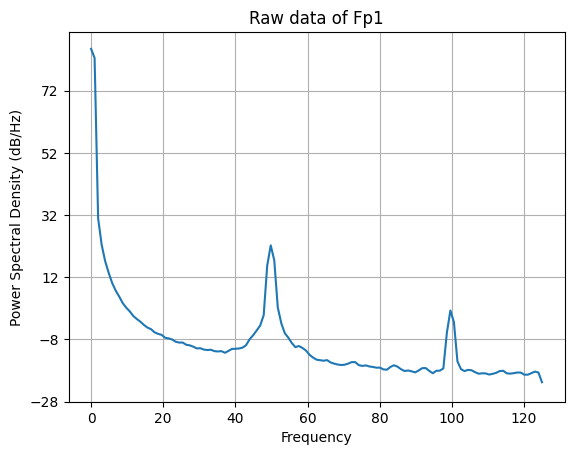

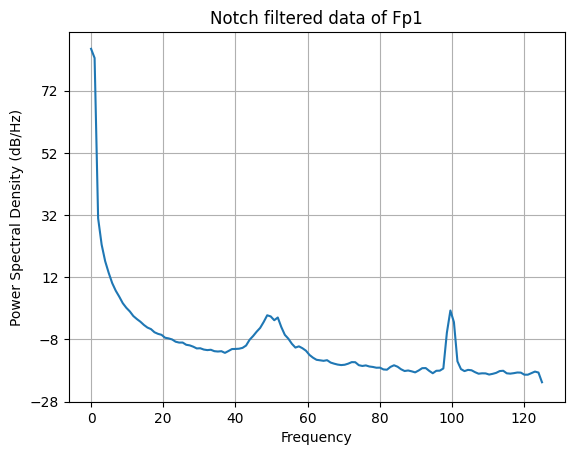

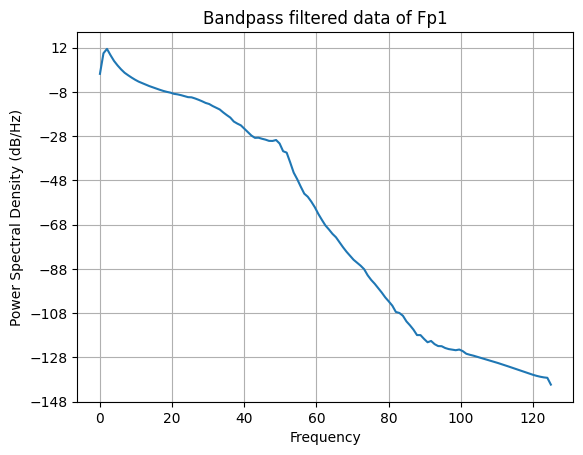

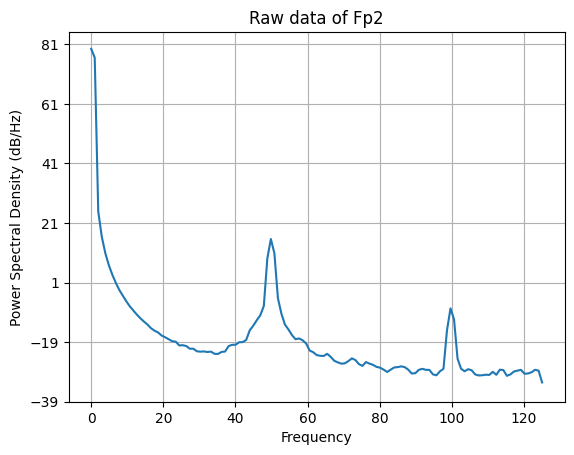

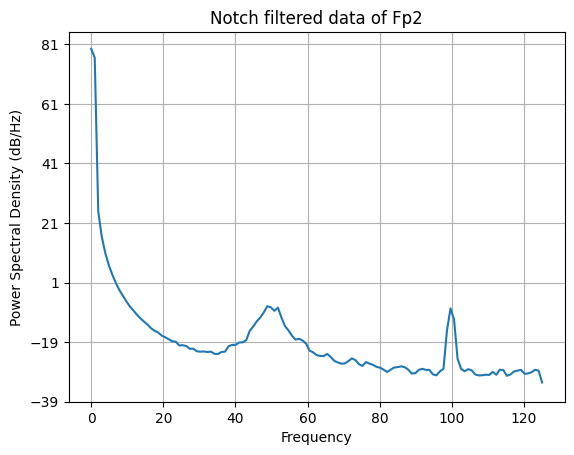

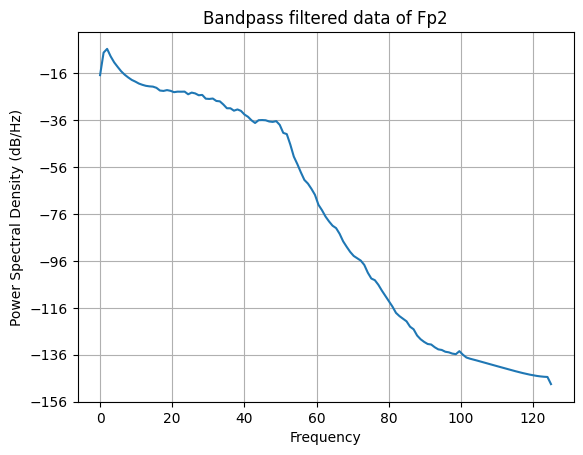

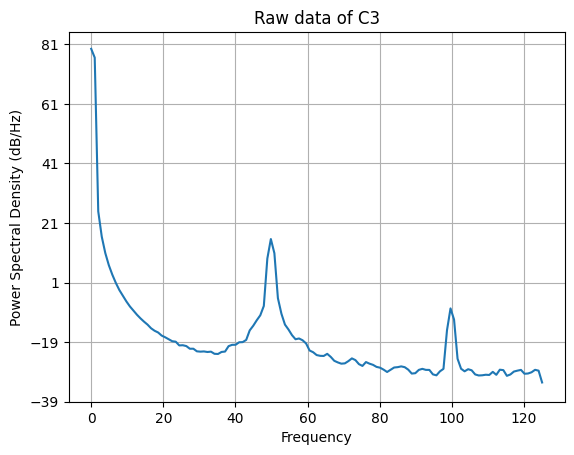

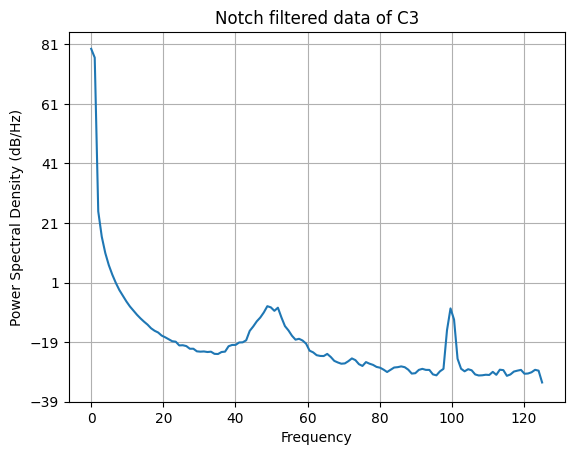

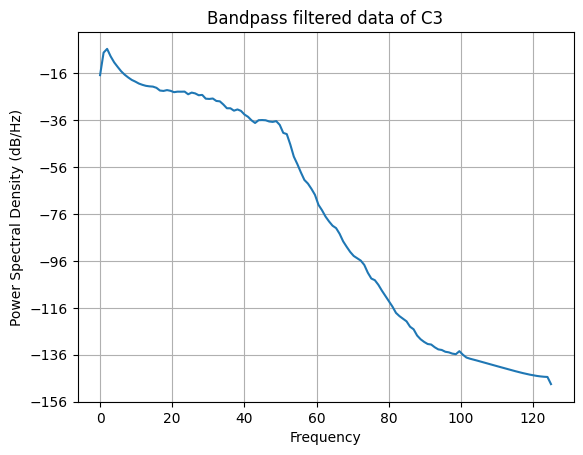

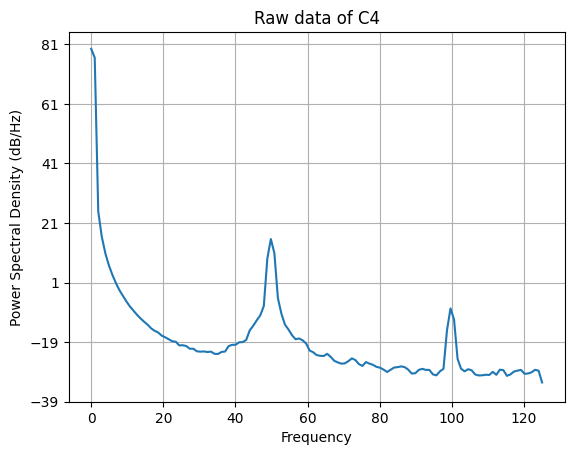

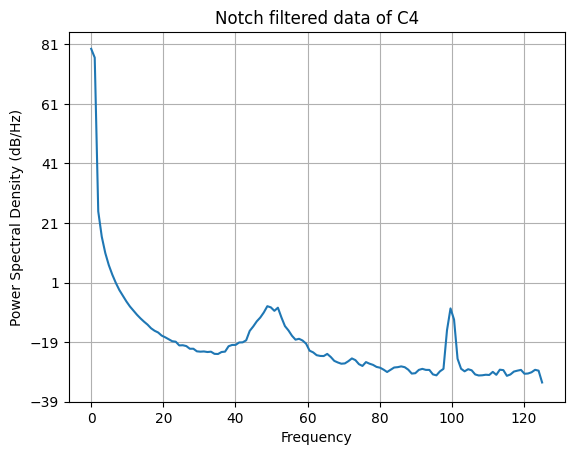

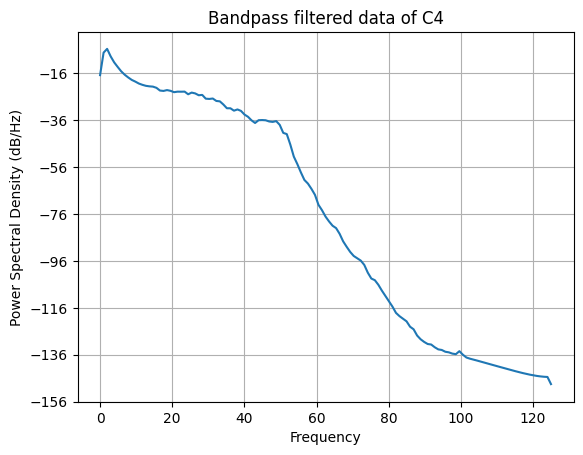

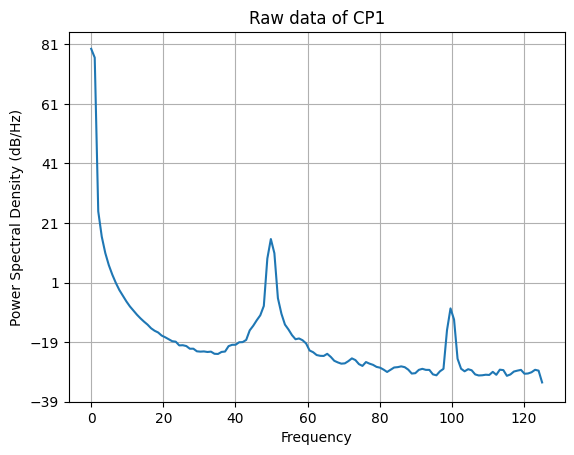

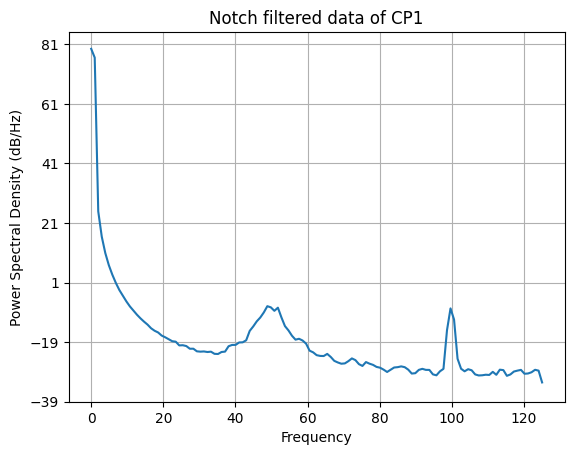

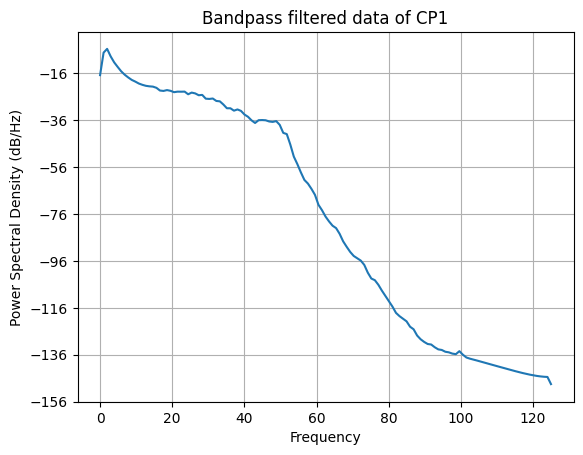

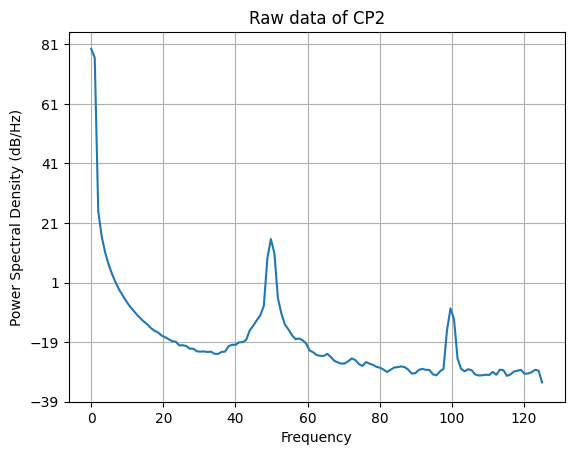

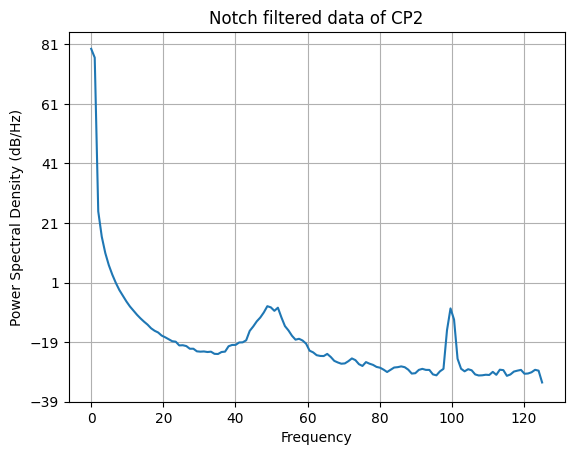

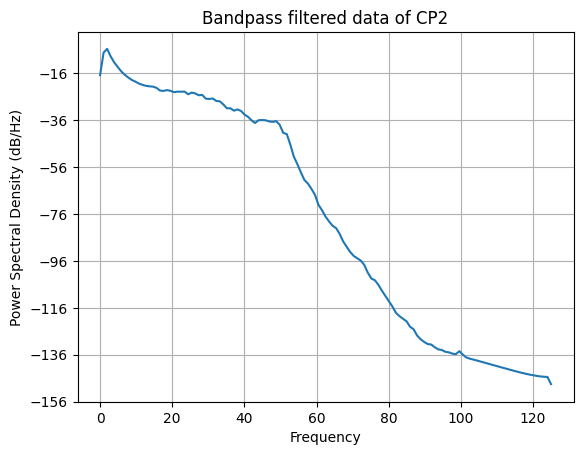

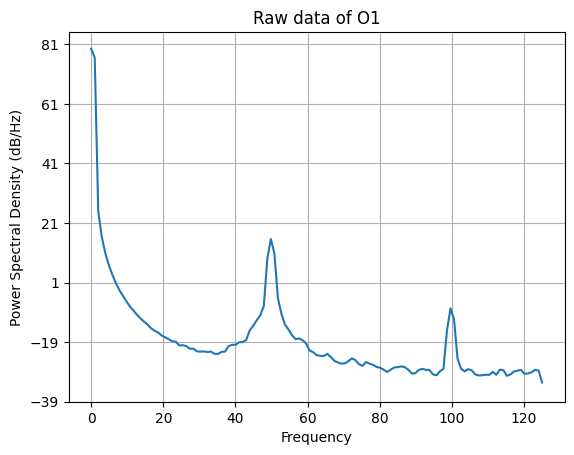

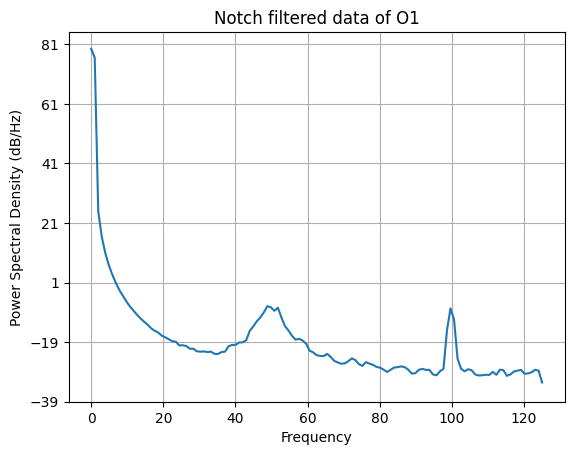

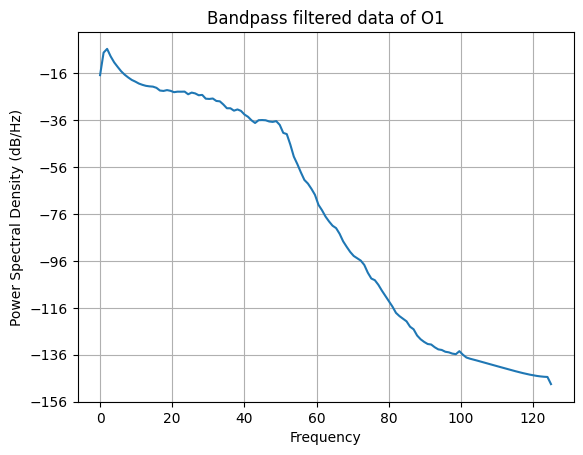

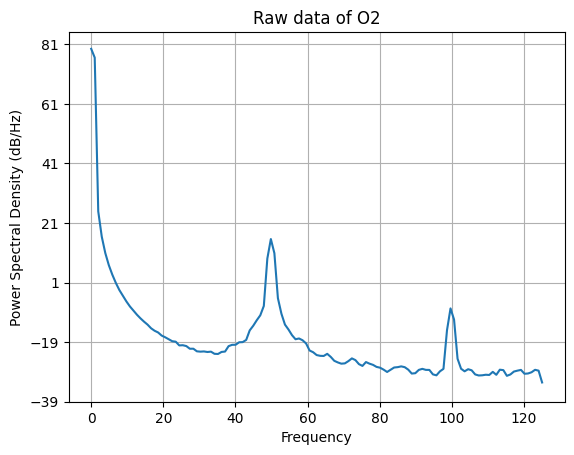

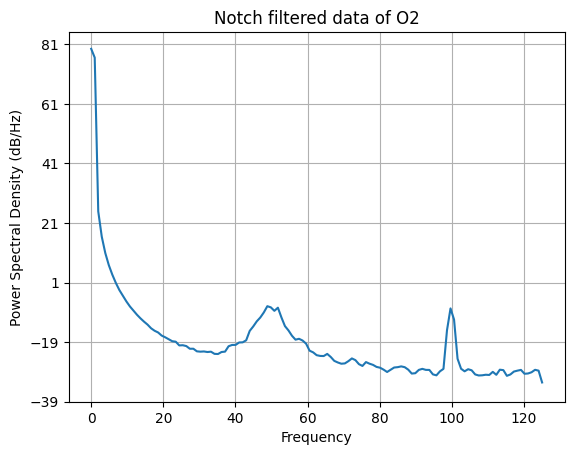

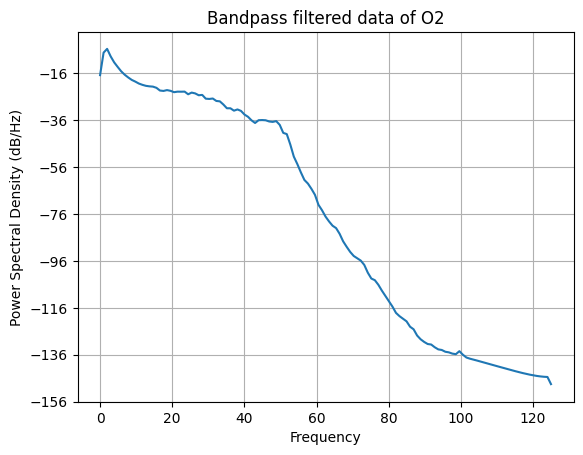

In [ ]:
channels = ['Fp1', 'Fp2', 'C3', 'C4', 'CP1', 'CP2', 'O1', 'O2']
for item in channels:
  channel = item
  signal = df[channel]
  plt.psd(signal, Fs = 250)
  plt.title('Raw data of ' + channel)
  plt.show()

  signal = apply_notch_filter(signal, notch_freq, fs)
  plt.psd(signal, Fs = 250)
  plt.title('Notch filtered data of ' + channel)
  plt.show()

  signal = butter_bandpass_filter(signal, lowcut, highcut, fs, 4)
  plt.psd(signal, Fs = 250)
  plt.title('Bandpass filtered data of ' + channel)
  plt.show()

In [ ]:
fs = 250
for each in df.columns:
  df[each] = apply_notch_filter(df[each], notch_freq, fs)
  df[each] = butter_bandpass_filter(df[each], lowcut, highcut, fs)

df['Marker'] = markers

In [ ]:
df

,Fp1,Fp2,C3,C4,CP1,CP2,O1,O2,Marker
0,-1.50,1.13,1.13,1.13,1.13,1.13,1.13,1.13,2
1,-12.00,4.73,4.73,4.73,4.73,4.73,4.73,4.73,2
2,-18.87,7.15,7.15,7.15,7.14,7.14,7.15,7.14,2
3,-20.63,7.87,7.86,7.86,7.86,7.86,7.87,7.85,2
4,-18.60,7.25,7.25,7.25,7.24,7.24,7.25,7.23,2
...,...,...,...,...,...,...,...,...,...
149995,3.96,-3.81,-3.80,-3.81,-3.81,-3.80,-3.81,-3.80,0
149996,4.40,-4.37,-4.36,-4.37,-4.37,-4.36,-4.37,-4.36,0
149997,4.00,-4.07,-4.06,-4.06,-4.07,-4.06,-4.06,-4.06,0
149998,2.51,-2.59,-2.59,-2.59,-2.59,-2.58,-2.59,-2.59,0


# Segmenting Data for SSVEP and MI

In [ ]:
# Names of the 7 columns you want to select
# ssvep_columns = ['Fp1', 'Fp2', 'P3', 'Pz', 'P4', 'O1', 'O2']
ssvep_columns = ['Fp1', 'Fp2', 'O1', 'O2']

mi_columns = ['C3', 'C4', 'CP1', 'CP2']

# Creating the first DataFrame with selected columns and the 'marker' column
ssvep_df = df[ssvep_columns + ['Marker']]

# Creating the second DataFrame with the remaining EEG columns and the 'marker' column
mi_df = df[mi_columns + ['Marker']]


In [ ]:
ssvep_df

,Fp1,Fp2,O1,O2,Marker
0,-1.50,1.13,1.13,1.13,2
1,-12.00,4.73,4.73,4.73,2
2,-18.87,7.15,7.15,7.14,2
3,-20.63,7.87,7.87,7.85,2
4,-18.60,7.25,7.25,7.23,2
...,...,...,...,...,...
149995,3.96,-3.81,-3.81,-3.80,0
149996,4.40,-4.37,-4.37,-4.36,0
149997,4.00,-4.07,-4.06,-4.06,0
149998,2.51,-2.59,-2.59,-2.59,0


In [ ]:
mi_df

,C3,C4,CP1,CP2,Marker
0,1.13,1.13,1.13,1.13,2
1,4.73,4.73,4.73,4.73,2
2,7.15,7.15,7.14,7.14,2
3,7.86,7.86,7.86,7.86,2
4,7.25,7.25,7.24,7.24,2
...,...,...,...,...,...
149995,-3.80,-3.81,-3.81,-3.80,0
149996,-4.36,-4.37,-4.37,-4.36,0
149997,-4.06,-4.06,-4.07,-4.06,0
149998,-2.59,-2.59,-2.59,-2.58,0


# SSVEP Classifier

## Epoching

In [ ]:
from sklearn.utils import shuffle

# Function to create epochs
def create_epochs(data, window_size, fs):
    epochs = []
    labels = []
    num_samples = fs * window_size  # Number of samples per epoch

    for i in range(0, len(data), num_samples):
        # Ensure we have a full epoch
        if i + num_samples <= len(data):
            epoch = data.iloc[i:i + num_samples, :-1]  # All columns except 'Marker'
            label = data.iloc[i, -1]  # Label is taken from the 'Marker' column
            epochs.append(epoch)
            labels.append(label)

    return epochs, labels

# Epoch parameters
window_size = 1  # window size in seconds

# Create epochs
epochs, labels = create_epochs(ssvep_df, window_size, 250)

# Shuffle the epochs
epochs_shuffled, labels_shuffled = shuffle(epochs, labels, random_state=42)


In [ ]:
from collections import Counter

# Count the number of instances per class
class_distribution_epochs = Counter(labels_shuffled)

class_distribution_epochs

Counter({2: 150, 3: 150, 1: 150, 0: 150})

In [ ]:
len(epochs_shuffled)

600

In [ ]:
# Flatten each epoch into a single vector and prepare labels
ssvep_X = np.array([epoch.values.flatten() for epoch in epochs_shuffled])
ssvep_y = np.array(labels_shuffled)

In [ ]:
ssvep_X.shape

(600, 1000)

In [ ]:
ssvep_y.shape

(600,)

In [ ]:
# Splitting the dataset into training and testing sets
X_train_ssvep, X_test_ssvep, y_train_ssvep, y_test_ssvep = train_test_split(ssvep_X, ssvep_y, test_size=0.2, random_state=42)

## Classification

In [ ]:
clf = LazyClassifier(verbose=0, ignore_warnings=True, custom_metric=None)

In [ ]:
ssvep_models, ssvep_predictions = clf.fit(X_train_ssvep, X_test_ssvep, y_train_ssvep, y_test_ssvep)

 97%|█████████▋| 28/29 [01:17<00:08,  8.18s/it]

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.007602 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 160469
[LightGBM] [Info] Number of data points in the train set: 480, number of used features: 1000
[LightGBM] [Info] Start training from score -1.464256
[LightGBM] [Info] Start training from score -1.377996
[LightGBM] [Info] Start training from score -1.369765
[LightGBM] [Info] Start training from score -1.337504
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with

100%|██████████| 29/29 [01:35<00:00,  3.28s/it]

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


In [ ]:
ssvep_models

,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
NuSVC,0.36,0.36,None,0.36,0.24
KNeighborsClassifier,0.35,0.34,None,0.35,0.07
RidgeClassifierCV,0.33,0.33,None,0.33,0.36
LinearSVC,0.30,0.31,None,0.30,4.21
LGBMClassifier,0.30,0.31,None,0.30,17.66
ExtraTreesClassifier,0.31,0.30,None,0.31,0.41
LogisticRegression,0.30,0.30,None,0.30,0.33
CalibratedClassifierCV,0.25,0.30,None,0.17,25.00
RidgeClassifier,0.28,0.29,None,0.28,0.15


In [ ]:
from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Split data into train and test sets
# X_train, X_test, y_train, y_test = train_test_split(features_ssvep, labels, test_size=0.2, random_state=42)

# Initialize classifiers
classifiers = {
    'Linear SVM': SVC(kernel='linear', C=1.0, random_state=42),
    'RBF SVM': SVC(kernel='rbf', C=1.0, random_state=42),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'KNN': KNeighborsClassifier(n_neighbors=5),
    'Decision Tree': DecisionTreeClassifier(criterion='entropy', max_depth=2),
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'Extra tree': ExtraTreesClassifier(n_estimators = 5, criterion ='entropy', max_features = 2)
}

# Train and evaluate each classifier
for clf_name, clf in classifiers.items():
    clf.fit(X_train_ssvep, y_train_ssvep)
    y_pred_ssvep = clf.predict(X_test_ssvep)
    accuracy = accuracy_score(y_test_ssvep, y_pred_ssvep)
    report = classification_report(y_test_ssvep, y_pred_ssvep)
    print(f"Classifier: {clf_name}")
    print(f"Accuracy: {accuracy:.2f}")
    print("Classification Report:")
    print(report)
    print("-------------------------------")


Classifier: Linear SVM
Accuracy: 0.28
Classification Report:
              precision    recall  f1-score   support

           0       0.34      0.38      0.36        39
           1       0.35      0.38      0.37        29
           2       0.12      0.11      0.12        28
           3       0.19      0.17      0.18        24

    accuracy                           0.28       120
   macro avg       0.25      0.26      0.26       120
weighted avg       0.26      0.28      0.27       120

-------------------------------
Classifier: RBF SVM
Accuracy: 0.24
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        39
           1       0.31      0.38      0.34        29
           2       0.50      0.04      0.07        28
           3       0.20      0.71      0.32        24

    accuracy                           0.24       120
   macro avg       0.25      0.28      0.18       120
weighted avg       0.23      0.24 

# MI Classifier


## Epoching

In [ ]:
from sklearn.utils import shuffle

# Function to create epochs
def create_epochs(data, window_size, fs):
    epochs = []
    labels = []
    num_samples = fs * window_size  # Number of samples per epoch

    for i in range(0, len(data), num_samples):
        # Ensure we have a full epoch
        if i + num_samples <= len(data):
            epoch = data.iloc[i:i + num_samples, :-1]  # All columns except 'Marker'
            label = data.iloc[i, -1]  # Label is taken from the 'Marker' column
            epochs.append(epoch)
            labels.append(label)

    return epochs, labels

# Epoch parameters
window_size = 1  # window size in seconds

# Create epochs
epochs, labels = create_epochs(mi_df, window_size, 250)

# Shuffle the epochs
epochs_shuffled, labels_shuffled = shuffle(epochs, labels, random_state=42)


In [ ]:
from collections import Counter

# Count the number of instances per class
class_distribution_epochs = Counter(labels_shuffled)

class_distribution_epochs

Counter({2: 150, 3: 150, 1: 150, 0: 150})

In [ ]:
epochs_shuffled[0]

,C3,C4,CP1,CP2
27500,-5.40,-5.40,-5.40,-5.41
27501,-3.69,-3.69,-3.69,-3.69
27502,-1.24,-1.24,-1.24,-1.24
27503,0.60,0.59,0.60,0.59
27504,1.13,1.12,1.13,1.12
...,...,...,...,...
27745,0.13,0.13,0.13,0.13
27746,0.18,0.19,0.19,0.19
27747,0.22,0.23,0.22,0.23
27748,0.22,0.22,0.22,0.22


## Classification

In [ ]:
# Flatten each epoch into a single vector and prepare labels
mi_X = np.array([epoch.values.flatten() for epoch in epochs_shuffled])
mi_y = np.array(labels_shuffled)

In [ ]:
mi_X.shape

(600, 1000)

In [ ]:
mi_y.shape

(600,)

In [ ]:
# Splitting the dataset into training and testing sets
X_train_mi, X_test_mi, y_train_mi, y_test_mi = train_test_split(mi_X, mi_y, test_size=0.2, random_state=42)

In [ ]:
clf = LazyClassifier(verbose=0, ignore_warnings=True, custom_metric=None)

In [ ]:
mi_models, mi_predictions = clf.fit(X_train_mi, X_test_mi, y_train_mi, y_test_mi)

 97%|█████████▋| 28/29 [01:13<00:07,  7.63s/it]

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.012696 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 160483
[LightGBM] [Info] Number of data points in the train set: 480, number of used features: 1000
[LightGBM] [Info] Start training from score -1.464256
[LightGBM] [Info] Start training from score -1.377996
[LightGBM] [Info] Start training from score -1.369765
[LightGBM] [Info] Start training from score -1.337504
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with

100%|██████████| 29/29 [01:30<00:00,  3.14s/it]

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


In [ ]:
mi_models

,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
KNeighborsClassifier,0.33,0.33,None,0.32,0.06
LinearSVC,0.33,0.32,None,0.33,4.82
ExtraTreeClassifier,0.31,0.30,None,0.31,0.09
Perceptron,0.31,0.30,None,0.30,0.13
RidgeClassifier,0.28,0.29,None,0.28,0.09
LogisticRegression,0.28,0.29,None,0.29,0.34
RidgeClassifierCV,0.28,0.29,None,0.27,0.23
SGDClassifier,0.31,0.29,None,0.30,0.22
AdaBoostClassifier,0.27,0.28,None,0.26,3.19


In [ ]:
from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Split data into train and test sets
# X_train, X_test, y_train, y_test = train_test_split(features_ssvep, labels, test_size=0.2, random_state=42)

# Initialize classifiers
classifiers = {
    'Linear SVM': SVC(kernel='linear', C=1.0, random_state=42),
    'RBF SVM': SVC(kernel='rbf', C=1.0, random_state=42),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'KNN': KNeighborsClassifier(n_neighbors=5),
    'Decision Tree': DecisionTreeClassifier(criterion='entropy', max_depth=2),
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'Extra tree': ExtraTreesClassifier(n_estimators = 5, criterion ='entropy', max_features = 2)
}

# Train and evaluate each classifier
for clf_name, clf in classifiers.items():
    clf.fit(X_train_mi, y_train_mi)
    y_pred_mi = clf.predict(X_test_mi)
    accuracy = accuracy_score(y_test_mi, y_pred_mi)
    report = classification_report(y_test_mi, y_pred_mi)
    print(f"Classifier: {clf_name}")
    print(f"Accuracy: {accuracy:.2f}")
    print("Classification Report:")
    print(report)
    print("-------------------------------")


Classifier: Linear SVM
Accuracy: 0.25
Classification Report:
              precision    recall  f1-score   support

           0       0.40      0.31      0.35        39
           1       0.29      0.34      0.32        29
           2       0.17      0.21      0.19        28
           3       0.10      0.08      0.09        24

    accuracy                           0.25       120
   macro avg       0.24      0.24      0.24       120
weighted avg       0.26      0.25      0.25       120

-------------------------------
Classifier: RBF SVM
Accuracy: 0.20
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        39
           1       0.33      0.10      0.16        29
           2       0.23      0.11      0.15        28
           3       0.19      0.75      0.30        24

    accuracy                           0.20       120
   macro avg       0.19      0.24      0.15       120
weighted avg       0.17      0.20 

## Hyperparameter Tuning

In [ ]:
from sklearn.model_selection import GridSearchCV

# # Define the parameter grid for SVM
# svm_param_grid = {
#     'C': [0.1, 1, 10, 100],
#     'gamma': [1, 0.1, 0.01, 0.001],
#     'kernel': ['rbf', 'poly', 'sigmoid']
# }

# # Create a GridSearchCV object for SVM
# svm_grid = GridSearchCV(SVC(), svm_param_grid, refit=True, verbose=2, cv=5)
# svm_grid.fit(X_train_scaled, y_train)


In [ ]:
# Define the parameter grid for Random Forest
rf_param_grid = {
    'n_estimators': [100, 200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [6, 7, 8],
    'criterion' :['gini', 'entropy']
}

# Create a GridSearchCV object for Random Forest
rf_grid = GridSearchCV(RandomForestClassifier(), rf_param_grid, refit=True, verbose=2, cv=5)
rf_grid.fit(X_train, y_train)


Fitting 5 folds for each of 54 candidates, totalling 270 fits
[CV] END criterion=gini, max_depth=6, max_features=auto, n_estimators=100; total time=   0.6s
[CV] END criterion=gini, max_depth=6, max_features=auto, n_estimators=100; total time=   0.5s
[CV] END criterion=gini, max_depth=6, max_features=auto, n_estimators=100; total time=   0.5s
[CV] END criterion=gini, max_depth=6, max_features=auto, n_estimators=100; total time=   0.4s
[CV] END criterion=gini, max_depth=6, max_features=auto, n_estimators=100; total time=   0.3s
[CV] END criterion=gini, max_depth=6, max_features=auto, n_estimators=200; total time=   0.6s
[CV] END criterion=gini, max_depth=6, max_features=auto, n_estimators=200; total time=   0.5s
[CV] END criterion=gini, max_depth=6, max_features=auto, n_estimators=200; total time=   0.5s
[CV] END criterion=gini, max_depth=6, max_features=auto, n_estimators=200; total time=   0.5s
[CV] END criterion=gini, max_depth=6, max_features=auto, n_estimators=200; total time=   1.0

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [6, 7, 8],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [100, 200, 500]},
             verbose=2)

In [ ]:
# from sklearn.linear_model import LogisticRegression

# # Define the parameter grid for Logistic Regression
# lr_param_grid = {
#     'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Regularization strength
#     'penalty': ['l1', 'l2', 'elasticnet', 'none'],  # Type of regularization
#     'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']  # Optimization algorithm
# }

# # Create a GridSearchCV object for Logistic Regression
# lr_grid = GridSearchCV(LogisticRegression(), lr_param_grid, refit=True, verbose=2, cv=5)
# lr_grid.fit(X_train_scaled, y_train)


In [ ]:
# # Define the parameter grid for MLPClassifier
# mlp_param_grid = {
#     'hidden_layer_sizes': [(50,50,50), (50,100,50), (100,)],
#     'activation': ['tanh', 'relu'],
#     'solver': ['sgd', 'adam'],
#     'alpha': [0.0001, 0.05],
#     'learning_rate': ['constant','adaptive'],
# }

# # Create a GridSearchCV object for MLPClassifier
# mlp_grid = GridSearchCV(MLPClassifier(max_iter=100), mlp_param_grid, refit=True, verbose=2, cv=5)
# mlp_grid.fit(X_train_scaled, y_train)


In [ ]:
# print("Best parameters for SVM:", svm_grid.best_params_)
# print("Best score for SVM:", svm_grid.best_score_)

print("Best parameters for Random Forest:", rf_grid.best_params_)
print("Best score for Random Forest:", rf_grid.best_score_)

# print("Best parameters for Logistic Regression:", lr_grid.best_params_)
# print("Best score for Logistic Regression:", lr_grid.best_score_)

# print("Best parameters for MLPClassifier:", mlp_grid.best_params_)
# print("Best score for MLPClassifier:", mlp_grid.best_score_)


Best parameters for Random Forest: {'criterion': 'gini', 'max_depth': 8, 'max_features': 'log2', 'n_estimators': 200}
Best score for Random Forest: 0.6875


In [ ]:
# Retrain the model with the best parameters

# svm_best = SVC(**svm_grid.best_params_)
# svm_best.fit(X_train_scaled, y_train)

rf_best = RandomForestClassifier(**rf_grid.best_params_)
rf_best.fit(X_train, y_train)

# lr_best = LogisticRegression(**lr_grid.best_params_)
# lr_best.fit(X_train_scaled, y_train)

# mlp_best = MLPClassifier(**mlp_grid.best_params_)
# mlp_best.fit(X_train_scaled, y_train)


RandomForestClassifier(max_depth=8, max_features='log2', n_estimators=200)

In [ ]:
# Import necessary libraries
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_iris


# Create the ExtraTreesClassifier model
extratrees_model = ExtraTreesClassifier(n_estimators=200, random_state=42)

# Train the model
extratrees_model.fit(X_train, y_train)

# Make predictions
y_pred = extratrees_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')


Accuracy: 0.80


In [ ]:
# Function to evaluate a classifier
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='macro')
    recall = recall_score(y_test, y_pred, average='macro')
    f1 = f1_score(y_test, y_pred, average='macro')
    return accuracy, precision, recall, f1

# Evaluate each classifier
# svm_metrics = evaluate_model(svm_best, X_test_scaled, y_test)
rf_metrics = evaluate_model(rf_best, X_test, y_test)
extratrees_metrics = evaluate_model(extratrees_model, X_test, y_test)
# lr_metrics = evaluate_model(lr_best, X_test_scaled, y_test)
# mlp_metrics = evaluate_model(mlp_best, X_test_scaled, y_test)

# Store the results in a dictionary
performance_results = {
    # 'SVM': svm_metrics,
    'Random Forest': rf_metrics,
    'Extra Trees' : extratrees_metrics,
    # 'Logistic Regression': lr_metrics,
    # 'Neural Network': mlp_metrics
}


In [ ]:
performance_df = pd.DataFrame(performance_results, index=['Accuracy', 'Precision', 'Recall', 'F1 Score']).T
performance_df

,Accuracy,Precision,Recall,F1 Score
Random Forest,0.70,0.68,0.68,0.68
Extra Trees,0.80,0.79,0.79,0.79


In [ ]:
## Save model - Random Forest tuned
import pickle

pickle.dump(extratrees_model, open('MI_Classification_Model.pkl', 'wb'))

# Combined Classifier

## Epoching

In [ ]:
df_8 = df[['C3', 'C4', 'CP1', 'CP2', 'Fp1', 'Fp2', 'O1', 'O2', 'Marker']]

In [ ]:
df_8

,C3,C4,CP1,CP2,Fp1,Fp2,O1,O2,Marker
0,32.84,75.66,-266.65,145.85,36.24,34.47,107.31,98.60,0
1,83.98,26.62,-259.09,36.60,48.54,46.77,-8.40,9.07,0
2,95.63,90.37,-280.45,131.67,96.58,94.65,92.55,92.45,0
3,62.03,60.00,-277.83,96.11,13.34,11.36,54.76,60.19,0
4,74.23,25.50,-266.87,52.38,99.37,97.43,10.02,13.64,0
...,...,...,...,...,...,...,...,...,...
24995,18.73,-15.92,232.66,-13.00,-45.03,-35.58,-8.73,-7.30,0
24996,27.20,18.63,209.81,5.15,11.11,20.38,9.89,11.58,0
24997,7.53,5.37,208.55,-1.88,9.28,18.61,3.00,-1.02,0
24998,-1.24,8.92,205.17,-2.10,-48.79,-39.50,-0.11,4.66,0


In [ ]:
from sklearn.utils import shuffle

# Function to create epochs
def create_epochs(data, window_size, fs):
    epochs = []
    labels = []
    num_samples = fs * window_size  # Number of samples per epoch

    for i in range(0, len(data), num_samples):
        # Ensure we have a full epoch
        if i + num_samples <= len(data):
            epoch = data.iloc[i:i + num_samples, :-1]  # All columns except 'Marker'
            label = data.iloc[i, -1]  # Label is taken from the 'Marker' column
            epochs.append(epoch)
            labels.append(label)

    return epochs, labels

# Epoch parameters
window_size = 1  # window size in seconds

# Create epochs
epochs, labels = create_epochs(df_8, window_size, 125)

# Shuffle the epochs
epochs_shuffled, labels_shuffled = shuffle(epochs, labels, random_state=42)


In [ ]:
from collections import Counter

# Count the number of instances per class
class_distribution_epochs = Counter(labels_shuffled)

class_distribution_epochs

Counter({1: 50, 2: 50, 0: 50, 3: 50})

In [ ]:
epochs_shuffled[0]

,C3,C4,CP1,CP2,Fp1,Fp2,O1,O2
11875,-49.26,8.14,-156.35,-20.66,-107.22,-100.95,-5.70,4.85
11876,17.24,-39.14,-126.85,-61.63,82.50,88.72,-43.75,-49.08
11877,13.74,80.13,-170.16,76.32,-8.72,-2.51,96.69,94.67
11878,-15.01,-50.78,-135.98,-96.92,-41.40,-35.10,-80.06,-70.87
11879,26.63,47.97,-158.90,44.49,93.14,99.46,67.69,56.24
...,...,...,...,...,...,...,...,...
11995,4.32,14.88,-126.94,-10.68,3.89,10.00,12.34,10.51
11996,0.91,7.96,-123.82,-15.48,8.71,14.99,7.77,4.69
11997,9.71,15.91,-125.72,-7.69,8.72,15.02,14.63,13.50
11998,7.90,12.84,-126.30,-13.60,5.18,11.66,9.35,8.83


## Classification

In [ ]:
# Flatten each epoch into a single vector and prepare labels
X = np.array([epoch.values.flatten() for epoch in epochs_shuffled])
y = np.array(labels_shuffled)


# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data
# scaler = StandardScaler()
# X_train_scaled = scaler.fit_transform(X_train)
# X_test_scaled = scaler.transform(X_test)


In [ ]:
clf = LazyClassifier(verbose=0, ignore_warnings=True, custom_metric=None)

In [ ]:
print(X.shape, 'x' ,len(y))

(200, 1000) x 200


In [ ]:
models,predictions = clf.fit(X_train, X_test, y_train, y_test)

 97%|█████████▋| 28/29 [00:18<00:01,  1.34s/it]

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003042 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 55000
[LightGBM] [Info] Number of data points in the train set: 160, number of used features: 1000
[LightGBM] [Info] Start training from score -1.337504
[LightGBM] [Info] Start training from score -1.386294
[LightGBM] [Info] Start training from score -1.386294
[LightGBM] [Info] Start training from score -1.437588
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with 

100%|██████████| 29/29 [00:21<00:00,  1.35it/s]

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


In [ ]:
models

,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
RandomForestClassifier,0.78,0.75,None,0.77,0.43
ExtraTreeClassifier,0.72,0.74,None,0.73,0.04
ExtraTreesClassifier,0.75,0.73,None,0.76,0.23
NuSVC,0.72,0.73,None,0.73,0.08
KNeighborsClassifier,0.70,0.72,None,0.70,0.04
LGBMClassifier,0.68,0.66,None,0.68,3.04
SVC,0.65,0.65,None,0.66,0.06
XGBClassifier,0.65,0.63,None,0.65,8.06
BaggingClassifier,0.62,0.60,None,0.62,0.73


## Hyperparameter Tuning

In [ ]:
from sklearn.model_selection import GridSearchCV

# # Define the parameter grid for SVM
# svm_param_grid = {
#     'C': [0.1, 1, 10, 100],
#     'gamma': [1, 0.1, 0.01, 0.001],
#     'kernel': ['rbf', 'poly', 'sigmoid']
# }

# # Create a GridSearchCV object for SVM
# svm_grid = GridSearchCV(SVC(), svm_param_grid, refit=True, verbose=2, cv=5)
# svm_grid.fit(X_train_scaled, y_train)


In [ ]:
# Define the parameter grid for Random Forest
rf_param_grid = {
    'n_estimators': [100, 200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [6, 7, 8],
    'criterion' :['gini', 'entropy']
}

# Create a GridSearchCV object for Random Forest
rf_grid = GridSearchCV(RandomForestClassifier(), rf_param_grid, refit=True, verbose=2, cv=5)
rf_grid.fit(X_train, y_train)


Fitting 5 folds for each of 54 candidates, totalling 270 fits
[CV] END criterion=gini, max_depth=6, max_features=auto, n_estimators=100; total time=   0.6s
[CV] END criterion=gini, max_depth=6, max_features=auto, n_estimators=100; total time=   0.4s
[CV] END criterion=gini, max_depth=6, max_features=auto, n_estimators=100; total time=   0.5s
[CV] END criterion=gini, max_depth=6, max_features=auto, n_estimators=100; total time=   0.4s
[CV] END criterion=gini, max_depth=6, max_features=auto, n_estimators=100; total time=   0.4s
[CV] END criterion=gini, max_depth=6, max_features=auto, n_estimators=200; total time=   0.9s
[CV] END criterion=gini, max_depth=6, max_features=auto, n_estimators=200; total time=   0.9s
[CV] END criterion=gini, max_depth=6, max_features=auto, n_estimators=200; total time=   1.0s
[CV] END criterion=gini, max_depth=6, max_features=auto, n_estimators=200; total time=   1.7s
[CV] END criterion=gini, max_depth=6, max_features=auto, n_estimators=200; total time=   3.6

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [6, 7, 8],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [100, 200, 500]},
             verbose=2)

In [ ]:
# from sklearn.linear_model import LogisticRegression

# # Define the parameter grid for Logistic Regression
# lr_param_grid = {
#     'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Regularization strength
#     'penalty': ['l1', 'l2', 'elasticnet', 'none'],  # Type of regularization
#     'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']  # Optimization algorithm
# }

# # Create a GridSearchCV object for Logistic Regression
# lr_grid = GridSearchCV(LogisticRegression(), lr_param_grid, refit=True, verbose=2, cv=5)
# lr_grid.fit(X_train_scaled, y_train)


In [ ]:
# # Define the parameter grid for MLPClassifier
# mlp_param_grid = {
#     'hidden_layer_sizes': [(50,50,50), (50,100,50), (100,)],
#     'activation': ['tanh', 'relu'],
#     'solver': ['sgd', 'adam'],
#     'alpha': [0.0001, 0.05],
#     'learning_rate': ['constant','adaptive'],
# }

# # Create a GridSearchCV object for MLPClassifier
# mlp_grid = GridSearchCV(MLPClassifier(max_iter=100), mlp_param_grid, refit=True, verbose=2, cv=5)
# mlp_grid.fit(X_train_scaled, y_train)


In [ ]:
# print("Best parameters for SVM:", svm_grid.best_params_)
# print("Best score for SVM:", svm_grid.best_score_)

print("Best parameters for Random Forest:", rf_grid.best_params_)
print("Best score for Random Forest:", rf_grid.best_score_)

# print("Best parameters for Logistic Regression:", lr_grid.best_params_)
# print("Best score for Logistic Regression:", lr_grid.best_score_)

# print("Best parameters for MLPClassifier:", mlp_grid.best_params_)
# print("Best score for MLPClassifier:", mlp_grid.best_score_)


Best parameters for Random Forest: {'criterion': 'entropy', 'max_depth': 6, 'max_features': 'log2', 'n_estimators': 100}
Best score for Random Forest: 0.51875


In [ ]:
# Retrain the model with the best parameters

# svm_best = SVC(**svm_grid.best_params_)
# svm_best.fit(X_train_scaled, y_train)

rf_best = RandomForestClassifier(**rf_grid.best_params_)
rf_best.fit(X_train, y_train)

# lr_best = LogisticRegression(**lr_grid.best_params_)
# lr_best.fit(X_train_scaled, y_train)

# mlp_best = MLPClassifier(**mlp_grid.best_params_)
# mlp_best.fit(X_train_scaled, y_train)


RandomForestClassifier(criterion='entropy', max_depth=6, max_features='log2')

In [ ]:
# Import necessary libraries
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_iris


# Create the ExtraTreesClassifier model
extratrees_model = ExtraTreesClassifier(n_estimators=200, random_state=42)

# Train the model
extratrees_model.fit(X_train, y_train)

# Make predictions
y_pred = extratrees_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')


Accuracy: 0.65


In [ ]:
# Function to evaluate a classifier
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='macro')
    recall = recall_score(y_test, y_pred, average='macro')
    f1 = f1_score(y_test, y_pred, average='macro')
    return accuracy, precision, recall, f1

# Evaluate each classifier
# svm_metrics = evaluate_model(svm_best, X_test_scaled, y_test)
rf_metrics = evaluate_model(rf_best, X_test, y_test)
extratrees_metrics = evaluate_model(extratrees_model, X_test, y_test)
# lr_metrics = evaluate_model(lr_best, X_test_scaled, y_test)
# mlp_metrics = evaluate_model(mlp_best, X_test_scaled, y_test)

# Store the results in a dictionary
performance_results = {
    # 'SVM': svm_metrics,
    'Random Forest': rf_metrics,
    'Extra Trees' : extratrees_metrics,
    # 'Logistic Regression': lr_metrics,
    # 'Neural Network': mlp_metrics
}


In [ ]:
performance_df = pd.DataFrame(performance_results, index=['Accuracy', 'Precision', 'Recall', 'F1 Score']).T
performance_df

,Accuracy,Precision,Recall,F1 Score
Random Forest,0.53,0.53,0.51,0.51
Extra Trees,0.65,0.63,0.64,0.63


In [ ]:
## Save model - Random Forest tuned
import pickle

pickle.dump(extratrees_metrics, open('Combined_Classification_Model.pkl', 'wb'))